In [482]:
import json
import requests as req
import pandas as pd
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt

# Utilizando API

In [50]:
respuesta = req.get ("https://datos.cdmx.gob.mx/api/records/1.0/search/?dataset=hechos-de-transito-reportados-por-ssc-base-comparativa&q=&rows=5818&facet=ano_evento&facet=mes&facet=condicion&facet=tipo_de_evento&facet=alcaldia&facet=tipo_de_interseccion&facet=identidad&refine.ano_evento=2019&refine.identidad=MOTOCICLISTA")

In [51]:
respuesta

<Response [200]>

In [52]:
accidentes = respuesta.json()

In [53]:
accidentes.keys()

dict_keys(['nhits', 'parameters', 'records', 'facet_groups'])

In [54]:
accidentes["records"]

[{'datasetid': 'hechos-de-transito-reportados-por-ssc-base-comparativa',
  'recordid': '7a20d5492d5886a5813c8e2c9e9969bd109a5fa2',
  'fields': {'hora': '6:57',
   'rango_edades_5_14_occiso': 0,
   'rango_de_edades_menores_de_1_ano_lesionado': 0,
   'lesionados_masculinos': 1,
   'rango_edades_1_4_occiso': 0,
   'rango_edades_5_14_lesionado': 0,
   'edad_lesionado': 'SD',
   'total_occisos': 0,
   'rango_edades_45_64_lesionado': 0,
   'rango_edades_1_4_lesionado': 0,
   'colonia': 'CHINAM PAC DE JUAREZ',
   'rango_edades_25_34_occiso': 0,
   'marca_de_vehiculo_1': 'SD',
   'lesionados_femeninos': 0,
   'se_desconoce_occiso': 0,
   'condicion': 'LESIONADO',
   'hora2': 6,
   'observaciones': 'SD',
   'no_folio': '907199',
   'rango_edades_65_lesionado': 0,
   'rango_edades_65_occiso': 0,
   'rango_edades_15_24_lesionado': 0,
   'rango_edades_35_44_occiso': 0,
   'alcaldia': 'IZTAPALAPA',
   'occiso_se_desconoce': 0,
   'rango_edades_35_44_lesionado': 0,
   'se_desconoce_lesionado': 1,
  

In [55]:
pdtabla = pd.DataFrame(accidentes["records"])

In [56]:
pdtabla

,datasetid,recordid,fields,geometry,record_timestamp
0,hechos-de-transito-reportados-por-ssc-base-com...,7a20d5492d5886a5813c8e2c9e9969bd109a5fa2,"{'hora': '6:57', 'rango_edades_5_14_occiso': 0...","{'type': 'Point', 'coordinates': [-99.039809, ...",2020-01-30T19:20:57.568000+00:00
1,hechos-de-transito-reportados-por-ssc-base-com...,16763ac3a6ae4fc2c2ef358456a5a5af972f385f,"{'hora': '11:53', 'rango_edades_5_14_occiso': ...","{'type': 'Point', 'coordinates': [-99.202105, ...",2020-01-30T19:20:57.568000+00:00
2,hechos-de-transito-reportados-por-ssc-base-com...,6be32ebf62d93e1f4bfc2dab9ac4dc8b671588f7,"{'hora': '5:51', 'rango_edades_5_14_occiso': 0...","{'type': 'Point', 'coordinates': [-99.012561, ...",2020-01-30T19:20:57.568000+00:00
3,hechos-de-transito-reportados-por-ssc-base-com...,30de87d6f9110fb6f69e2e0bc16d8f710bc75711,"{'hora': '9:56', 'rango_edades_5_14_occiso': 0...","{'type': 'Point', 'coordinates': [-99.19029, 1...",2020-01-30T19:20:57.568000+00:00
4,hechos-de-transito-reportados-por-ssc-base-com...,4a0c2e9c3c738c218444b4be439afc53fca48e05,"{'hora': '21:43', 'rango_edades_5_14_occiso': ...","{'type': 'Point', 'coordinates': [-99.099683, ...",2020-01-30T19:20:57.568000+00:00
...,...,...,...,...,...
5813,hechos-de-transito-reportados-por-ssc-base-com...,24ef0deb5b9e806ecf64ade25b6621b718565dd0,"{'hora': '8:20', 'rango_edades_5_14_occiso': 0...","{'type': 'Point', 'coordinates': [-99.121178, ...",2020-01-30T19:20:57.568000+00:00
5814,hechos-de-transito-reportados-por-ssc-base-com...,94df7d26650fb509c49240f38da148315bcfbd4b,"{'hora': '10:31', 'rango_edades_5_14_occiso': ...","{'type': 'Point', 'coordinates': [-99.057732, ...",2020-01-30T19:20:57.568000+00:00
5815,hechos-de-transito-reportados-por-ssc-base-com...,a11bf91fffb89214aa1edec6a56dca2595542b38,"{'hora': '17:02', 'rango_edades_5_14_occiso': ...","{'type': 'Point', 'coordinates': [-99.134312, ...",2020-01-30T19:20:57.568000+00:00
5816,hechos-de-transito-reportados-por-ssc-base-com...,6a3e08dbebfc63d5ef54bdb113f46821b3aee528,"{'hora': '17:09', 'rango_edades_5_14_occiso': ...","{'type': 'Point', 'coordinates': [-99.151408, ...",2020-01-30T19:20:57.568000+00:00


In [57]:
pdtabla = pdtabla.drop("recordid", axis = 1)

In [58]:
pdtabla

,datasetid,fields,geometry,record_timestamp
0,hechos-de-transito-reportados-por-ssc-base-com...,"{'hora': '6:57', 'rango_edades_5_14_occiso': 0...","{'type': 'Point', 'coordinates': [-99.039809, ...",2020-01-30T19:20:57.568000+00:00
1,hechos-de-transito-reportados-por-ssc-base-com...,"{'hora': '11:53', 'rango_edades_5_14_occiso': ...","{'type': 'Point', 'coordinates': [-99.202105, ...",2020-01-30T19:20:57.568000+00:00
2,hechos-de-transito-reportados-por-ssc-base-com...,"{'hora': '5:51', 'rango_edades_5_14_occiso': 0...","{'type': 'Point', 'coordinates': [-99.012561, ...",2020-01-30T19:20:57.568000+00:00
3,hechos-de-transito-reportados-por-ssc-base-com...,"{'hora': '9:56', 'rango_edades_5_14_occiso': 0...","{'type': 'Point', 'coordinates': [-99.19029, 1...",2020-01-30T19:20:57.568000+00:00
4,hechos-de-transito-reportados-por-ssc-base-com...,"{'hora': '21:43', 'rango_edades_5_14_occiso': ...","{'type': 'Point', 'coordinates': [-99.099683, ...",2020-01-30T19:20:57.568000+00:00
...,...,...,...,...
5813,hechos-de-transito-reportados-por-ssc-base-com...,"{'hora': '8:20', 'rango_edades_5_14_occiso': 0...","{'type': 'Point', 'coordinates': [-99.121178, ...",2020-01-30T19:20:57.568000+00:00
5814,hechos-de-transito-reportados-por-ssc-base-com...,"{'hora': '10:31', 'rango_edades_5_14_occiso': ...","{'type': 'Point', 'coordinates': [-99.057732, ...",2020-01-30T19:20:57.568000+00:00
5815,hechos-de-transito-reportados-por-ssc-base-com...,"{'hora': '17:02', 'rango_edades_5_14_occiso': ...","{'type': 'Point', 'coordinates': [-99.134312, ...",2020-01-30T19:20:57.568000+00:00
5816,hechos-de-transito-reportados-por-ssc-base-com...,"{'hora': '17:09', 'rango_edades_5_14_occiso': ...","{'type': 'Point', 'coordinates': [-99.151408, ...",2020-01-30T19:20:57.568000+00:00


In [59]:
pdtcompleta = pd.json_normalize(pdtabla["fields"])

In [60]:
pdtcompleta

,hora,rango_edades_5_14_occiso,rango_de_edades_menores_de_1_ano_lesionado,lesionados_masculinos,rango_edades_1_4_occiso,rango_edades_5_14_lesionado,edad_lesionado,total_occisos,rango_edades_45_64_lesionado,rango_edades_1_4_lesionado,...,ano_evento,tipo_de_interseccion,tipo_de_evento,hospital,marca_de_vehiculo_3,tipo_de_vehiculo_3,lugar_del_deceso,edad_occiso,marca_de_vehiculo_4,tipo_de_vehiculo_4
0,6:57,0,0,1,0,0,SD,0,0,0,...,2019,T,CHOQUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11:53,0,0,1,0,0,SD,0,0,0,...,2019,Y,CHOQUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5:51,0,0,1,0,0,28,0,0,0,...,2019,T,DERRAPADO,ISSSTE ZARAGOZA,NaN,NaN,NaN,NaN,NaN,NaN
3,9:56,0,0,1,0,0,21,0,0,0,...,2019,CRUZ,CHOQUE,DARIO FERNANDEZ,NaN,NaN,NaN,NaN,NaN,NaN
4,21:43,0,0,1,0,0,20,0,0,0,...,2019,CRUZ,CHOQUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,8:20,0,0,1,0,0,SD,0,0,0,...,2019,CRUZ,DERRAPADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5814,10:31,0,0,1,0,0,31,0,0,0,...,2019,T,DERRAPADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5815,17:02,0,0,1,0,0,36,0,0,0,...,2019,DESNIVEL,DERRAPADO,ROMA,NaN,NaN,NaN,NaN,NaN,NaN
5816,17:09,0,0,1,0,0,SD,0,0,0,...,2019,CRUZ,DERRAPADO,TRAUMATOLOGIA SUR,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
pdtcompleta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 61 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   hora                                        5818 non-null   object 
 1   rango_edades_5_14_occiso                    5818 non-null   int64  
 2   rango_de_edades_menores_de_1_ano_lesionado  5818 non-null   int64  
 3   lesionados_masculinos                       5818 non-null   int64  
 4   rango_edades_1_4_occiso                     5818 non-null   int64  
 5   rango_edades_5_14_lesionado                 5818 non-null   int64  
 6   edad_lesionado                              5743 non-null   object 
 7   total_occisos                               5818 non-null   int64  
 8   rango_edades_45_64_lesionado                5818 non-null   int64  
 9   rango_edades_1_4_lesionado                  5818 non-null   int64  
 10  colonia     

In [412]:
worktable = pd.DataFrame(pdtcompleta, columns = ["mes","alcaldia","tipo_de_evento",'marca_de_vehiculo_1'])
#Unicamente me interesa ver las marcas de motocicletas involucradas en los accidentes.
worktable

,mes,alcaldia,tipo_de_evento,marca_de_vehiculo_1
0,Enero,IZTAPALAPA,CHOQUE,SD
1,Enero,ALVARO OBREGON,CHOQUE,HONDA
2,Enero,IZTAPALAPA,DERRAPADO,SD
3,Enero,ALVARO OBREGON,CHOQUE,AUDI
4,Enero,VENUSTIANO CARRANZA,CHOQUE,HONDA
...,...,...,...,...
5813,Diciembre,VENUSTIANO CARRANZA,DERRAPADO,SD
5814,Diciembre,IZTACALCO,DERRAPADO,VENTO
5815,Diciembre,CUAUHTEMOC,DERRAPADO,SD
5816,Diciembre,COYOACAN,DERRAPADO,SD


In [477]:
worktable["marca_de_vehiculo_1"].value_counts()

SD          1341
ITALIKA     1134
YAMAHA       492
HONDA        382
VENTO        257
            ... 
LIDER          1
SEDAN          1
ESCOVERI       1
SCAPE          1
PREST          1
Name: marca_de_vehiculo_1, Length: 279, dtype: int64

In [467]:
meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"] 
lista_choques = [0,0,0,0,0,0,0,0,0,0,0,0]
lista_derrapes = [0,0,0,0,0,0,0,0,0,0,0,0]
for j in meses: 
        for i in range(len(worktable["mes"])):
                if (worktable["mes"][i]==j) and ((worktable["tipo_de_evento"][i]=="DERRAPADO") or (worktable["tipo_de_evento"][i]=="VOLCADURA")):
                    if j == "Enero":
                        k = 0
                    elif j == "Febrero":
                        k = 1
                    elif j == "Marzo":
                        k = 2
                    elif j == "Abril":
                        k = 3
                    elif j == "Mayo":
                        k = 4
                    elif j == "Junio":
                        k = 5
                    elif j == "Julio":
                        k = 6
                    elif j == "Agosto":
                        k = 7
                    elif j == "Septiembre":
                        k = 8
                    elif j == "Octubre":
                        k = 9
                    elif j == "Noviembre":
                        k = 10
                    else:
                        k = 11
                    lista_derrapes[k] = lista_derrapes[k]+1
                elif (worktable["mes"][i]==j) and ((worktable["tipo_de_evento"][i]=="CHOQUE") or (worktable["tipo_de_evento"][i]=="ATROPELLADO")) :
                        if j == "Enero":
                            k = 0
                        elif j == "Febrero":
                            k = 1
                        elif j == "Marzo":
                            k = 2
                        elif j == "Abril":
                            k = 3
                        elif j == "Mayo":
                            k = 4
                        elif j == "Junio":
                            k = 5
                        elif j == "Julio":
                            k = 6
                        elif j == "Agosto":
                            k = 7
                        elif j == "Septiembre":
                            k = 8
                        elif j == "Octubre":
                            k = 9
                        elif j == "Noviembre":
                            k = 10
                        else:
                            k = 11  
                        lista_choques[k] = lista_choques[k]+1

In [468]:
lista_choques

[186, 150, 219, 181, 161, 173, 341, 312, 323, 325, 331, 344]

In [469]:
lista_derrapes

[138, 129, 146, 145, 136, 135, 281, 296, 324, 286, 316, 440]

In [472]:
tabla_accidentes_mes = pd.DataFrame({"Mes":meses,"T Accidente: Choques":lista_choques,"T Accidente: Derrapes":lista_derrapes}, index=["1","2","3","4","5","6","7","8","9","10","11","12"])

In [473]:
tabla_accidentes_mes

,Mes,T Accidente: Choques,T Accidente: Derrapes
1,Enero,186,138
2,Febrero,150,129
3,Marzo,219,146
4,Abril,181,145
5,Mayo,161,136
6,Junio,173,135
7,Julio,341,281
8,Agosto,312,296
9,Septiembre,323,324
10,Octubre,325,286


In [507]:
tabla_accidentes_mes["Total de Accidentes"] = (tabla_accidentes_mes["T Accidente: Choques"]) + (tabla_accidentes_mes["T Accidente: Derrapes"])

In [508]:
tabla_accidentes_mes

,Mes,T Accidente: Choques,T Accidente: Derrapes,Total de Accidentes
1,Enero,186,138,324
2,Febrero,150,129,279
3,Marzo,219,146,365
4,Abril,181,145,326
5,Mayo,161,136,297
6,Junio,173,135,308
7,Julio,341,281,622
8,Agosto,312,296,608
9,Septiembre,323,324,647
10,Octubre,325,286,611


# Utilizo Web Scrapping

In [509]:
url_clima = "https://www.weather-mx.com/es/mexico/ciudad-de-mexico-clima"

In [510]:
respuesta_clima = req.get(url_clima)

In [511]:
respuesta_clima

<Response [200]>

In [512]:
sopa_clima = bs(respuesta_clima.content,'html.parser')

In [513]:
clima_anual = sopa_clima.find_all("span",{"class":"strong"})

In [371]:
clima_anual

[<span class="strong">21.7°C</span>,
 <span class="strong">23.4°C</span>,
 <span class="strong">25.7°C</span>,
 <span class="strong">26.8°C</span>,
 <span class="strong">26.8°C</span>,
 <span class="strong">25.3°C</span>,
 <span class="strong">23.8°C</span>,
 <span class="strong">23.9°C</span>,
 <span class="strong">23.3°C</span>,
 <span class="strong">22.9°C</span>,
 <span class="strong">22.9°C</span>,
 <span class="strong">21.9°C</span>,
 <span class="strong">Abril</span>,
 <span class="strong">Mayo</span>,
 <span class="strong">Enero</span>,
 <span class="strong">7.4°C</span>,
 <span class="strong">8.5°C</span>,
 <span class="strong">10.4°C</span>,
 <span class="strong">12.3°C</span>,
 <span class="strong">13.2°C</span>,
 <span class="strong">13.5°C</span>,
 <span class="strong">12.5°C</span>,
 <span class="strong">12.7°C</span>,
 <span class="strong">12.7°C</span>,
 <span class="strong">11.2°C</span>,
 <span class="strong">9.7°C</span>,
 <span class="strong">8.1°C</span>,
 <span cl

In [372]:
precipitacion = []
for i in range(43,55):
    precipitacion.append(clima_anual[i].text)
precipitacion

['7.6mm',
 '7mm',
 '8.9mm',
 '22.5mm',
 '66.5mm',
 '140mm',
 '189.5mm',
 '171.2mm',
 '139.8mm',
 '72.4mm',
 '12.6mm',
 '8.2mm']

In [417]:
meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"] 

In [418]:
precipitacion_anual = pd.DataFrame({"Mes" : meses, "Precipitacion/Mes":precipitacion},index=["1","2","3","4","5","6","7","8","9","10","11","12"])

In [419]:
precipitacion_anual

,Mes,Precipitacion/Mes
1,Enero,7.6mm
2,Febrero,7mm
3,Marzo,8.9mm
4,Abril,22.5mm
5,Mayo,66.5mm
6,Junio,140mm
7,Julio,189.5mm
8,Agosto,171.2mm
9,Septiembre,139.8mm
10,Octubre,72.4mm


In [514]:
lista_accidentes_precipitacion = tabla_accidentes_mes.merge(precipitacion_anual)

In [515]:
lista_accidentes_precipitacion

,Mes,T Accidente: Choques,T Accidente: Derrapes,Total de Accidentes,Precipitacion/Mes
0,Enero,186,138,324,7.6mm
1,Febrero,150,129,279,7mm
2,Marzo,219,146,365,8.9mm
3,Abril,181,145,326,22.5mm
4,Mayo,161,136,297,66.5mm
5,Junio,173,135,308,140mm
6,Julio,341,281,622,189.5mm
7,Agosto,312,296,608,171.2mm
8,Septiembre,323,324,647,139.8mm
9,Octubre,325,286,611,72.4mm


In [545]:
lista_accidentes_precipitacion.to_csv("Relacion de accidentes con las lluvias.csv")

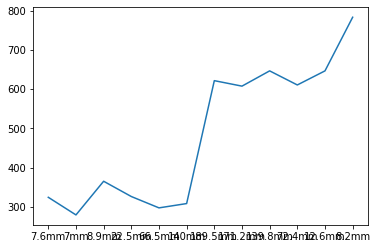

In [520]:
plt.plot(lista_accidentes_precipitacion["Precipitacion/Mes"],lista_accidentes_precipitacion["Total de Accidentes"])

# Otro Web Scrapping

In [497]:
url3 = "https://www.motorpasionmoto.com/industria/listado-de-las-marcas-mas-fiables-del-mercado"

In [498]:
respuesta3 = req.get(url3)

In [499]:
respuesta3

<Response [200]>

In [521]:
sopa_marca = bs(respuesta3.content,'html.parser')

In [522]:
tabla_marca = sopa_marca.find_all("table",{"class":"tabla-datos"})

In [523]:
tabla_marca

[<table class="tabla-datos">
 <tr> <th>    Marca   </th> <th>    Porcentaje de fallos    </th> </tr>
 <tr> <td>    Yamaha  </td> <td>    11</td> </tr>
 <tr> <td>    Suzuki  </td> <td>    12  </td> </tr>
 <tr> <td>    Honda   </td> <td>    12  </td> </tr>
 <tr> <td>    Kawasaki    </td> <td>    15  </td> </tr>
 <tr> <td>    Victory </td> <td>    17  </td> </tr>
 <tr> <td>    Harley-Davidson </td> <td>    26  </td> </tr>
 <tr> <td>    Triumph </td> <td>    29  </td> </tr>
 <tr> <td>    Ducati  </td> <td>    33  </td> </tr>
 <tr> <td>    BMW </td> <td>    40  </td> </tr>
 <tr> <td>    Can-Am  </td> <td>    42  </td> </tr>
 </table>]

In [531]:
comps = tabla_marca[0].text.split()

In [532]:
comps

['Marca',
 'Porcentaje',
 'de',
 'fallos',
 'Yamaha',
 '11',
 'Suzuki',
 '12',
 'Honda',
 '12',
 'Kawasaki',
 '15',
 'Victory',
 '17',
 'Harley-Davidson',
 '26',
 'Triumph',
 '29',
 'Ducati',
 '33',
 'BMW',
 '40',
 'Can-Am',
 '42']

In [541]:
marca = []
porcentaje_fallos = []
for i in range (4,23,2):
    marca.append(comps[i]) 
for j in range (5,25,2):
    porcentaje_fallos.append(comps[j])

porcentaje_fallos
 

['11', '12', '12', '15', '17', '26', '29', '33', '40', '42']

In [543]:
tabla_fallos = pd.DataFrame({"Marcas":marca,"Porcentaje Fallos":porcentaje_fallos},index = ["1","2","3","4","5","6","7","8","9","10"])

In [544]:
tabla_fallos

,Marcas,Porcentaje Fallos
1,Yamaha,11
2,Suzuki,12
3,Honda,12
4,Kawasaki,15
5,Victory,17
6,Harley-Davidson,26
7,Triumph,29
8,Ducati,33
9,BMW,40
10,Can-Am,42


In [546]:
tabla_fallos.to_csv("Marcas menos confiables.cvs")